In [53]:
1 + 1

2

## Project 2

### Data Manipulation

In [54]:
import pandas as pd

In [55]:
df = pd.read_csv('/Users/erenokandan/Desktop/surface_temp.csv')

#Loading the data in

In [56]:
df = df.dropna()

# We wanna make sure that we do not have any NAs in our dataset

In [57]:
df.isna().sum()

ObjectId     0
Country      0
F1961        0
F1962        0
F1963        0
            ..
F2019        0
F2020        0
F2021        0
F2022        0
continent    0
Length: 65, dtype: int64

In [58]:
import matplotlib.pyplot as plt

In [59]:
df.dtypes

ObjectId       int64
Country       object
F1961        float64
F1962        float64
F1963        float64
              ...   
F2019        float64
F2020        float64
F2021        float64
F2022        float64
continent     object
Length: 65, dtype: object

In [60]:
df = df.drop(columns=['ObjectId'])

# There is no need for us to include objectID column

In [61]:
df.head()

,Country,F1961,F1962,F1963,F1964,F1965,F1966,F1967,F1968,F1969,...,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022,continent
0,"Afghanistan, Islamic Rep. of",-0.113,-0.164,0.847,-0.764,-0.244,0.226,-0.371,-0.423,-0.539,...,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012,Asia
1,Albania,0.627,0.326,0.075,-0.166,-0.388,0.559,-0.074,0.081,-0.013,...,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518,Europe
2,Algeria,0.164,0.114,0.077,0.250,-0.100,0.433,-0.026,-0.067,0.291,...,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688,Africa
4,"Andorra, Principality of",0.736,0.112,-0.752,0.308,-0.490,0.415,0.637,0.018,-0.137,...,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243,Europe
5,Angola,0.041,-0.152,-0.190,-0.229,-0.196,0.175,-0.081,-0.193,0.188,...,0.828,1.331,1.609,0.870,1.395,1.752,1.162,1.553,1.212,Africa


#### Removing everyhting after comma

In [62]:
df['Country'] = df['Country'].str.split(',').str[0]

# There is no need to include names after comma

In [63]:
df.head()

,Country,F1961,F1962,F1963,F1964,F1965,F1966,F1967,F1968,F1969,...,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022,continent
0,Afghanistan,-0.113,-0.164,0.847,-0.764,-0.244,0.226,-0.371,-0.423,-0.539,...,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012,Asia
1,Albania,0.627,0.326,0.075,-0.166,-0.388,0.559,-0.074,0.081,-0.013,...,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518,Europe
2,Algeria,0.164,0.114,0.077,0.250,-0.100,0.433,-0.026,-0.067,0.291,...,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688,Africa
4,Andorra,0.736,0.112,-0.752,0.308,-0.490,0.415,0.637,0.018,-0.137,...,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243,Europe
5,Angola,0.041,-0.152,-0.190,-0.229,-0.196,0.175,-0.081,-0.193,0.188,...,0.828,1.331,1.609,0.870,1.395,1.752,1.162,1.553,1.212,Africa


### Creating visualization

In [64]:
continent_groups = df.groupby('continent')

# Create an empty DataFrame to store mean temperatures for each continent
continent_mean_temp = pd.DataFrame()

In [106]:
for continent, group_df in continent_groups:
    group_df = group_df.drop(columns=['continent', 'Country'])
    mean_temp = group_df.mean()
    continent_mean_temp[continent] = mean_temp

# Looking at each individual continent

In [66]:
print(continent_mean_temp)

         Africa  Americas      Asia    Europe  Oceania
F1961  0.060952  0.031703 -0.019079  0.870900   0.0863
F1962 -0.012619 -0.056054  0.158053 -0.208100   0.0694
F1963  0.014976  0.118243  0.215974 -0.486267  -0.1085
F1964 -0.112238 -0.046595 -0.199579  0.039333   0.0659
F1965 -0.231738 -0.123405 -0.101263 -0.498500  -0.4294
...         ...       ...       ...       ...      ...
F2018  1.097881  0.846595  1.452421  1.756933   0.8724
F2019  1.368095  1.139676  1.463684  1.736533   1.0555
F2020  1.265881  1.373270  1.455026  2.036567   1.1412
F2021  1.329452  1.087514  1.659105  1.426967   1.0280
F2022  1.045238  0.910514  1.457500  2.138700   1.1175

[62 rows x 5 columns]


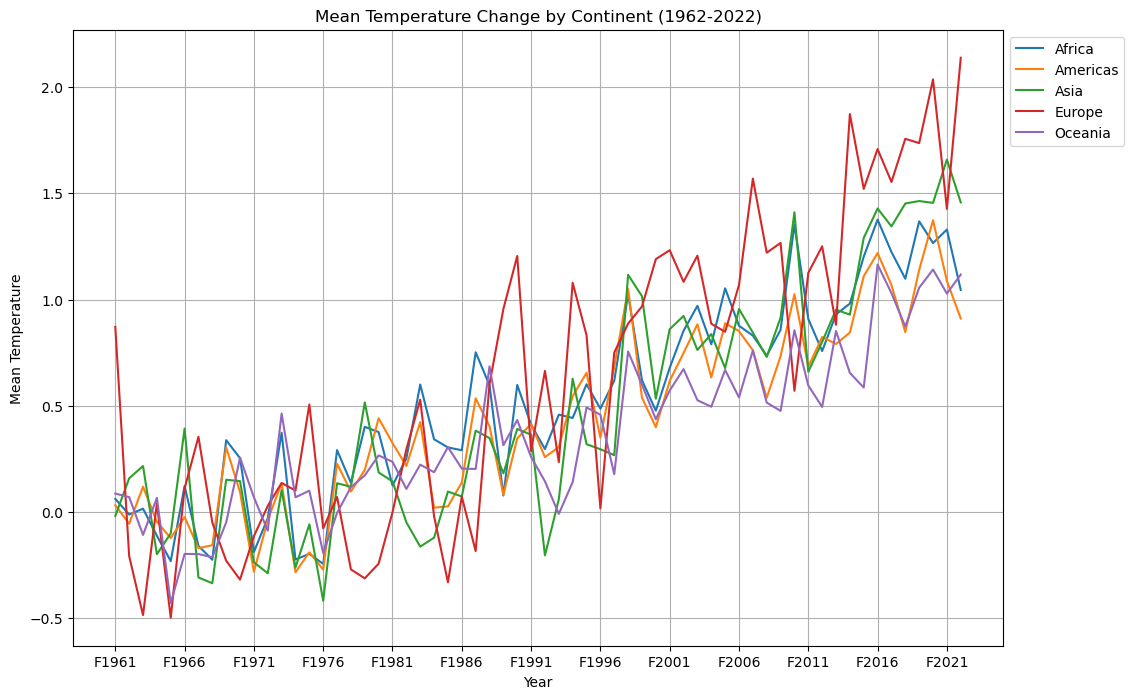

In [67]:
plt.figure(figsize=(12, 8))
for continent in continent_mean_temp.columns:
    plt.plot(continent_mean_temp.index, continent_mean_temp[continent], label=continent)

plt.title('Mean Temperature Change by Continent (1962-2022)')
plt.xlabel('Year')
plt.ylabel('Mean Temperature')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

# Set x-axis ticks to display every 5 years
plt.xticks(continent_mean_temp.index[::5])

plt.show()

# Temperature change data

In [68]:
europe_df = df[df['continent'] == 'Europe'].copy()

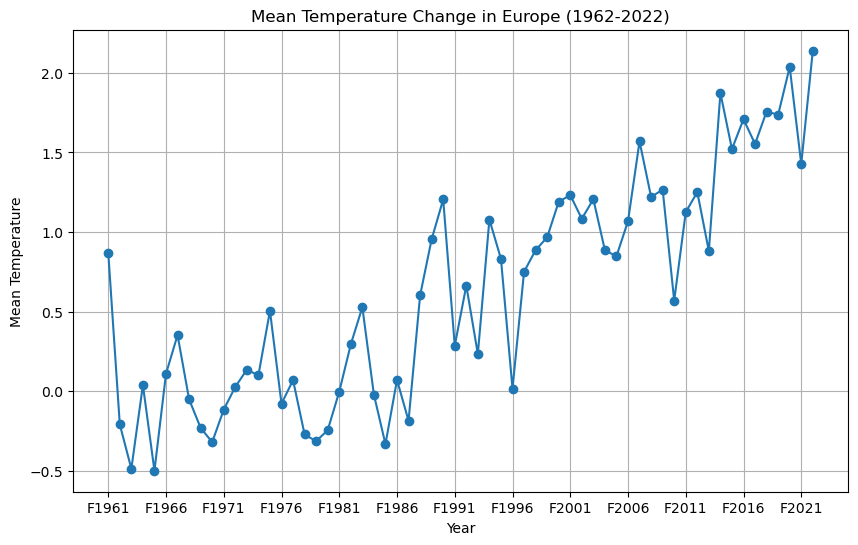

In [69]:
europe_df = df[df['continent'] == 'Europe']

europe_df = europe_df.drop(columns=['continent'])
europe_df = europe_df.drop(columns=['Country'])

europe_mean_temp = europe_df.mean()
e
plt.figure(figsize=(10, 6))
plt.plot(europe_mean_temp.index, europe_mean_temp.values, marker='o', linestyle='-')
plt.title('Mean Temperature Change in Europe (1962-2022)')
plt.xlabel('Year')
plt.ylabel('Mean Temperature')
plt.xticks(europe_mean_temp.index[::5])
plt.grid(True)
plt.show()

# Looking at Europe indivudally

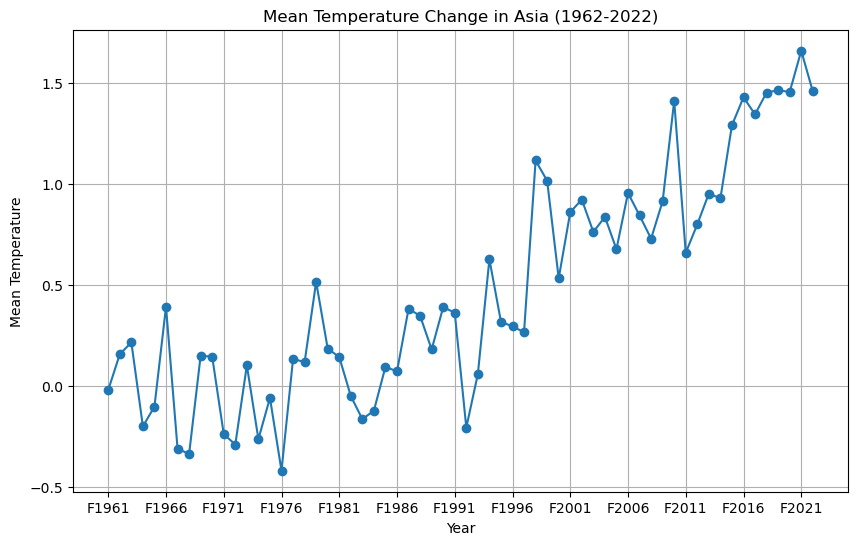

In [70]:
asia_df = df[df['continent'] == 'Asia']
asia_df = asia_df.drop(columns=['continent'])
asia_df = asia_df.drop(columns=['Country'])

# Calculate the mean temperature for each year across all European countries
asia_mean_temp = asia_df.mean()

plt.figure(figsize=(10, 6))
plt.plot(asia_mean_temp.index, asia_mean_temp.values, marker='o', linestyle='-')
plt.title('Mean Temperature Change in Asia (1962-2022)')
plt.xlabel('Year')
plt.ylabel('Mean Temperature')
plt.xticks(europe_mean_temp.index[::5])
plt.grid(True)
plt.show()

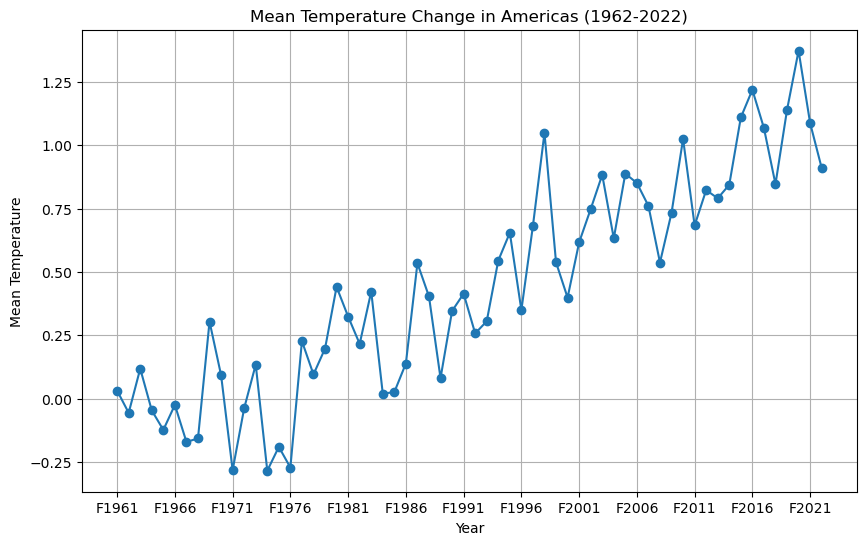

In [71]:
americas_df = df[df['continent'] == 'Americas']

# Drop the 'Continent' column as it's not needed for plotting
americas_df = americas_df.drop(columns=['continent'])
americas_df = americas_df.drop(columns=['Country'])

americas_mean_temp = americas_df.mean()

plt.figure(figsize=(10, 6))
plt.plot(americas_mean_temp.index, americas_mean_temp.values, marker='o', linestyle='-')
plt.title('Mean Temperature Change in Americas (1962-2022)')
plt.xlabel('Year')
plt.ylabel('Mean Temperature')
plt.xticks(americas_mean_temp.index[::5])
plt.grid(True)
plt.show()


# Plot for seeing the change in Americas

### Regression Model

In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt 

# Loading the necessary libraries that are needed

In [73]:
country_column = df.iloc[:, 0] 
continent_column = df.iloc[:, -1]

# We wanna order the columns for better visualization

In [74]:
df = df.iloc[:, 1:-1]

In [75]:
df = pd.concat([country_column, continent_column, df], axis=1)

df.head(2)

# Creating the new dataset

,Country,continent,F1961,F1962,F1963,F1964,F1965,F1966,F1967,F1968,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,Afghanistan,Asia,-0.113,-0.164,0.847,-0.764,-0.244,0.226,-0.371,-0.423,...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,Albania,Europe,0.627,0.326,0.075,-0.166,-0.388,0.559,-0.074,0.081,...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518


In [76]:
df['continent'].unique()

# Looking at the unique values

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

In [77]:
europe_data = df[df['continent'] == 'Europe']
europe_data = europe_data.drop(columns = 'Country')

europe_data.head()

# Linear Regression for Europe


,continent,F1961,F1962,F1963,F1964,F1965,F1966,F1967,F1968,F1969,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
1,Europe,0.627,0.326,0.075,-0.166,-0.388,0.559,-0.074,0.081,-0.013,...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
4,Europe,0.736,0.112,-0.752,0.308,-0.490,0.415,0.637,0.018,-0.137,...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243
11,Europe,1.031,-0.621,-0.727,-0.371,-0.883,0.602,0.676,0.211,-0.126,...,1.098,2.409,2.167,2.096,1.741,2.524,2.370,2.315,1.395,2.498
24,Europe,0.903,0.488,-0.248,-0.528,-0.456,1.151,0.027,0.421,-0.485,...,1.476,1.196,1.438,1.899,0.954,2.192,2.112,2.037,1.629,1.831
45,Europe,1.117,-0.641,-1.019,-0.274,-0.603,-0.500,0.831,0.277,-0.135,...,0.397,2.677,1.516,1.852,1.619,2.109,2.180,2.633,1.690,2.219


In [78]:
year_columns = europe_data.columns[1:]  # Exclude the first column (region/country names)
yearly_data = europe_data[year_columns]

# Calculate the mean across each column (axis=1)
mean_temp_change = yearly_data.mean(axis=0)

# Create a new DataFrame with the mean values
mean_temp_change_df = pd.DataFrame(mean_temp_change).T


mean_temp_change_df.head()

,F1961,F1962,F1963,F1964,F1965,F1966,F1967,F1968,F1969,F1970,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,0.8709,-0.2081,-0.486267,0.039333,-0.4985,0.110333,0.353533,-0.0502,-0.230033,-0.318967,...,0.880933,1.873433,1.5212,1.708567,1.553433,1.756933,1.736533,2.036567,1.426967,2.1387


In [79]:
mean_temp_change_df.columns = mean_temp_change_df.columns.str.replace('F', '')

mean_temp_change_df.head()

# Replacing the F at the start of each column

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,0.8709,-0.2081,-0.486267,0.039333,-0.4985,0.110333,0.353533,-0.0502,-0.230033,-0.318967,...,0.880933,1.873433,1.5212,1.708567,1.553433,1.756933,1.736533,2.036567,1.426967,2.1387


In [80]:
europe = pd.melt(mean_temp_change_df, var_name='Year', value_name='Temp_Change')

europe.head()

# We switch the columns into rows for better visualization and training 

,Year,Temp_Change
0,1961,0.870900
1,1962,-0.208100
2,1963,-0.486267
3,1964,0.039333
4,1965,-0.498500


In [83]:
europe['Year'] = europe['Year'].astype(str).astype(int)

# Year was stored as object, conver it into integer

In [84]:
europe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         62 non-null     int64  
 1   Temp_Change  62 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [86]:
X = europe.drop(columns = 'Temp_Change')
y = europe['Temp_Change']

# Creting the dependent and independent variables

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Splitting the dataset


In [88]:
model = LinearRegression()
model.fit(X_train, y_train)
#Training the dataset

LinearRegression()

In [89]:
future_years = np.array([[2025], [2026], [2027]])  # Example future years
predictions = model.predict(future_years)

/Users/erenokandan/miniconda3/envs/datascience/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [90]:
for year, prediction in zip(future_years.flatten(), predictions):
    print(f"Year: {year}, Predicted Mean Temperature Change: {prediction}")

Year: 2025, Predicted Mean Temperature Change: 1.7869065187436775
Year: 2026, Predicted Mean Temperature Change: 1.8220832232353956
Year: 2027, Predicted Mean Temperature Change: 1.857259927727128


/Users/erenokandan/miniconda3/envs/datascience/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


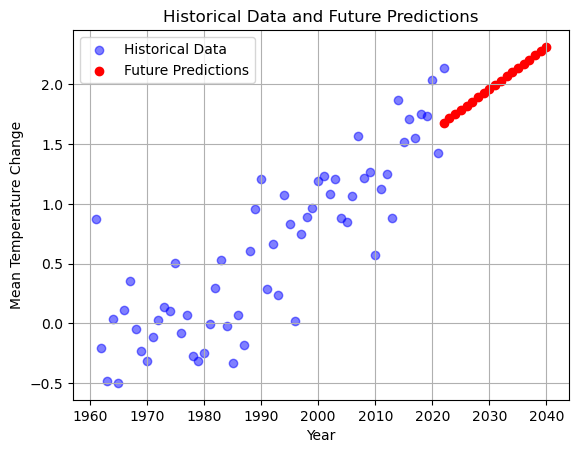

In [91]:
future_years = np.arange(2022, 2041).reshape(-1, 1)  # Future years from 2022 to 2040
future_predictions = model.predict(future_years)

# Plot historical data
plt.scatter(europe['Year'], europe['Temp_Change'], color='blue', label='Historical Data', alpha=0.5)
plt.scatter(future_years, future_predictions, color='red', label='Future Predictions')


# Plot future predictions
# Set labels and title
plt.xlabel('Year')
plt.ylabel('Mean Temperature Change')
plt.title('Historical Data and Future Predictions')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

In [93]:
slope = model.coef_[0]
intercept = model.intercept_

print(f"Line Formula: y = {slope}x + {intercept}")

# Looking at the line formula of our projection

Line Formula: y = 0.035176704491725753x + -69.44592007700098


In [94]:
y_pred = model.predict(X_train)

In [95]:
mse = mean_squared_error(y_train, y_pred)
print("Mean Squared Error:", mse)

# Mean squared error looks good

Mean Squared Error: 0.12161163291115297


### Modelling Americas


Same process as Europe is applied

In [96]:
americas_data = df[df['continent'] == 'Americas']
americas_data = americas_data.drop(columns = 'Country')

americas_data.head()


,continent,F1961,F1962,F1963,F1964,F1965,F1966,F1967,F1968,F1969,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
6,Americas,0.086,-0.024,0.234,0.189,-0.365,-0.001,-0.257,-0.200,0.317,...,0.770,0.814,1.051,1.125,0.960,0.664,0.843,1.224,0.893,0.839
8,Americas,0.122,-0.046,0.162,-0.343,0.090,-0.163,0.000,0.472,0.292,...,0.442,0.951,0.957,0.488,1.095,0.878,0.760,1.123,1.031,0.643
12,Americas,0.073,-0.062,-0.097,0.192,0.054,-0.172,-0.146,-0.324,-0.065,...,0.565,0.883,1.114,1.042,1.331,1.023,1.443,1.611,0.879,1.480
16,Americas,-0.001,-0.137,-0.060,-0.055,-0.105,-0.195,-0.297,-0.205,0.260,...,0.785,0.697,1.502,1.446,1.342,0.850,1.556,1.716,1.286,1.031
19,Americas,0.247,0.012,0.409,-0.123,0.220,-0.083,0.332,-0.162,0.522,...,0.507,0.955,1.533,0.824,0.981,0.562,0.921,1.315,0.738,0.644


In [97]:
year_columns = americas_data.columns[1:] 
yearly_data = americas_data[year_columns]


mean_temp_change = yearly_data.mean(axis=0)

mean_temp_change_df = pd.DataFrame(mean_temp_change).T


mean_temp_change_df.head()

,F1961,F1962,F1963,F1964,F1965,F1966,F1967,F1968,F1969,F1970,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,0.031703,-0.056054,0.118243,-0.046595,-0.123405,-0.02473,-0.170757,-0.157162,0.304189,0.09273,...,0.790622,0.844432,1.109757,1.218973,1.068135,0.846595,1.139676,1.37327,1.087514,0.910514


In [98]:
mean_temp_change_df.columns = mean_temp_change_df.columns.str.replace('F', '')

mean_temp_change_df.head()

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,0.031703,-0.056054,0.118243,-0.046595,-0.123405,-0.02473,-0.170757,-0.157162,0.304189,0.09273,...,0.790622,0.844432,1.109757,1.218973,1.068135,0.846595,1.139676,1.37327,1.087514,0.910514


In [99]:
americas = pd.melt(mean_temp_change_df, var_name='Year', value_name='Temp_Change')

americas.head()

,Year,Temp_Change
0,1961,0.031703
1,1962,-0.056054
2,1963,0.118243
3,1964,-0.046595
4,1965,-0.123405


In [100]:
americas['Year'] = americas['Year'].astype(str).astype(int)

In [101]:
X = americas.drop(columns = 'Temp_Change')
y = americas['Temp_Change']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [102]:
future_years = np.array([[2025], [2026], [2027]])  # Example future years
predictions = model.predict(future_years)

for year, prediction in zip(future_years.flatten(), predictions):
    print(f"Year: {year}, Predicted Mean Temperature Change: {prediction}")



Year: 2025, Predicted Mean Temperature Change: 1.1930430534790162
Year: 2026, Predicted Mean Temperature Change: 1.2156101820969951
Year: 2027, Predicted Mean Temperature Change: 1.238177310714974


/Users/erenokandan/miniconda3/envs/datascience/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


/Users/erenokandan/miniconda3/envs/datascience/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


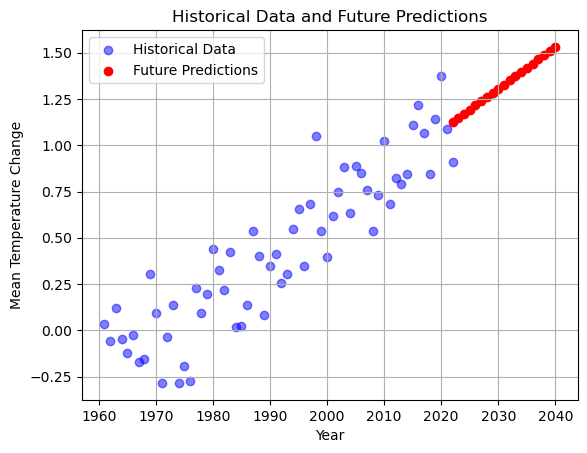

In [103]:
future_years = np.arange(2022, 2041).reshape(-1, 1)  
future_predictions = model.predict(future_years)

plt.scatter(americas['Year'], americas['Temp_Change'], color='blue', label='Historical Data', alpha=0.5)
plt.scatter(future_years, future_predictions, color='red', label='Future Predictions')



plt.xlabel('Year')
plt.ylabel('Mean Temperature Change')
plt.title('Historical Data and Future Predictions')
plt.legend()

plt.grid(True)
plt.show()

In [104]:
slope = model.coef_[0]
intercept = model.intercept_

print(f"Line Formula: y = {slope}x + {intercept}")

Line Formula: y = 0.022567128617979673x + -44.505392397929825


In [105]:
y_pred = model.predict(X_train)

mse = mean_squared_error(y_train, y_pred)
print("Mean Squared Error:", mse)



Mean Squared Error: 0.03538478463768826
